# 4 cross-section extraction
## The justification of moving from 6D analysis to 2$\times$3D

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [9]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/Xsec_extraction/'

In [3]:
versions['overlay date'] = '2018_09_22'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


# What is the acceptance as a function of $p_p$ and $\theta_p$ in different bins of $p_\mu$ and $\theta_\mu$

In [4]:
def sample_in_xy_bin(sample,xmin,xmax,ymin,ymax,xvar,yvar):
    return sample[(xmin<sample[xvar])
                  &(sample[xvar]<xmax)
                  &(ymin<sample[yvar])
                  &(sample[yvar]<ymax)]

def sample_in_muon_bin(sample,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max):
    return sample_in_xy_bin(sample,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max,xvar='truth_Pmu',yvar='truth_Pmu_cos_theta')
def sample_in_proton_bin(sample,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max):
    return sample_in_xy_bin(sample,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max,xvar='truth_Pp',yvar='truth_Pp_cos_theta')

## proton efficiency in muon bins

In [22]:
large_bins_Pmu_min = np.array([0,0.45])
large_bins_Pmu_max = np.array([large_bins_Pmu_min[1],2])
large_bins_Pmu_centers = 0.5*(large_bins_Pmu_min+large_bins_Pmu_max)
large_bins_Pmu_cos_theta_min = np.array([-0.2,0.5])
large_bins_Pmu_cos_theta_max = np.array([large_bins_Pmu_cos_theta_min[1],1])
large_bins_Pmu_cos_theta_centers = 0.5*(large_bins_Pmu_cos_theta_min+large_bins_Pmu_cos_theta_max)
hCC1p_muon_bins = np.zeros((2,2))

In [122]:
Pp_bins = linspace(0.3,1.,10); mid_Pp = 0.5*(Pp_bins[1:]+Pp_bins[:-1]); bin_width_Pp=(mid_Pp[1]-mid_Pp[0])
Pp_cos_theta_bins = linspace(0.2,1,10); mid_Pp_cos_theta = 0.5*(Pp_cos_theta_bins[1:]+Pp_cos_theta_bins[:-1]); bin_width_Pp_cos_theta=(mid_Pp_cos_theta[1]-mid_Pp_cos_theta[0])

done.


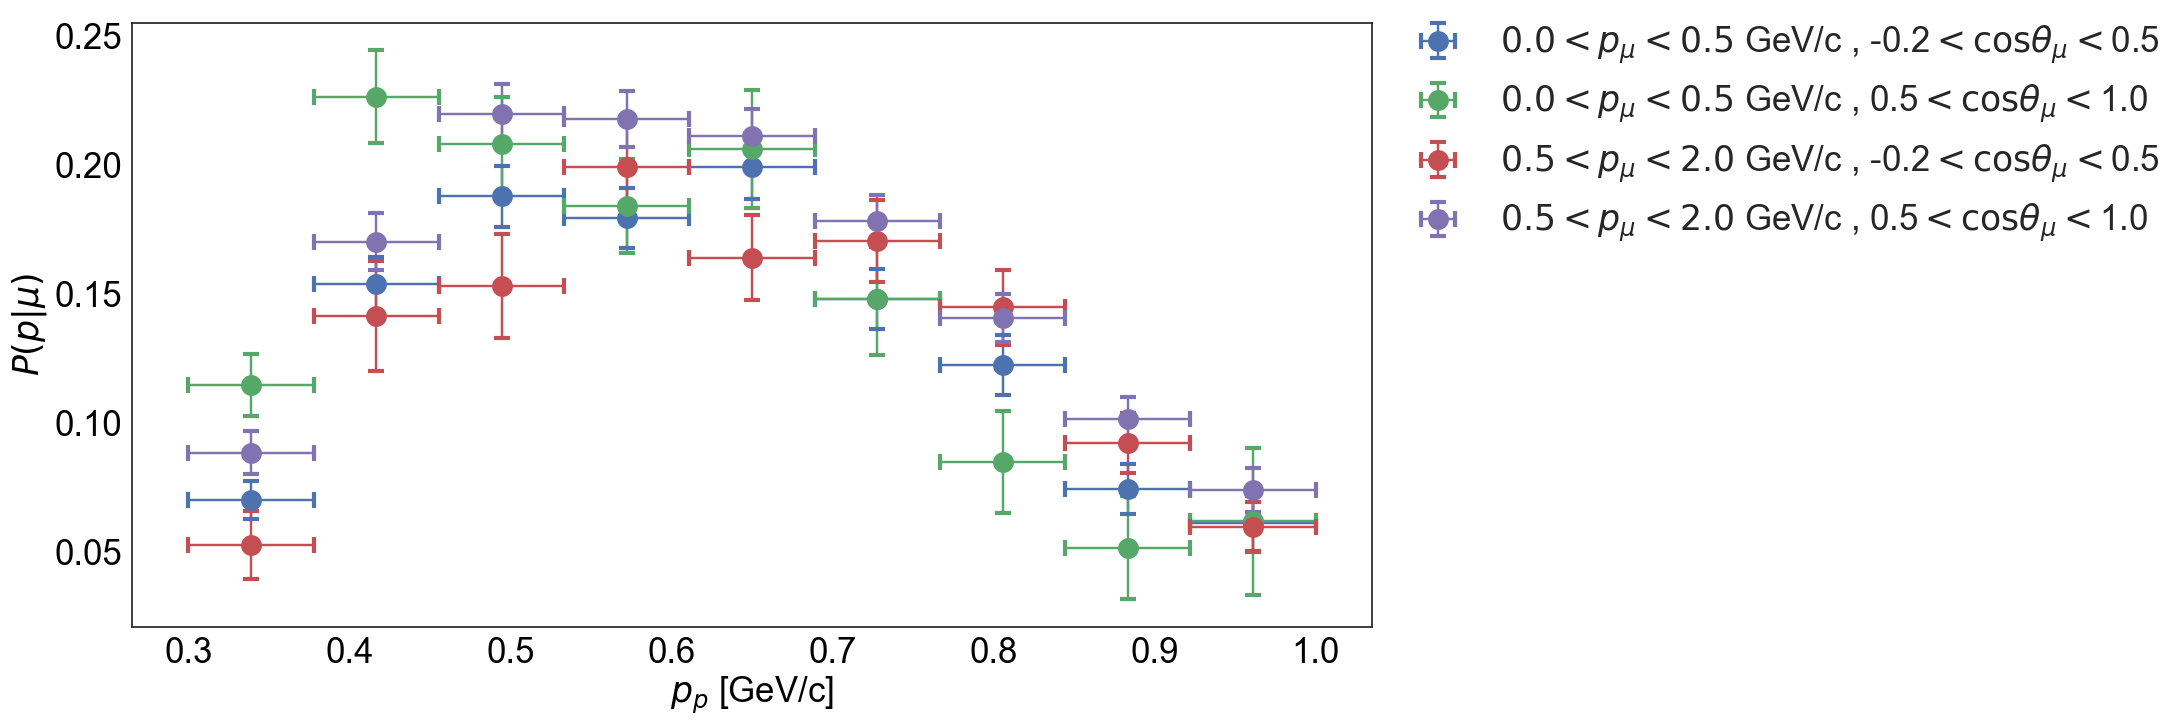

In [127]:
heff,heff_err = dict(), dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = 'iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)

        genie_CC1p_muon_bin = sample_in_muon_bin(genie_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)        
        gen_muon_bin = sample_in_limits(sam=genie_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_muon_bin = gen_muon_bin[gen_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_muon_bin = sample_in_muon_bin(selected_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
        sel_muon_bin = sample_in_limits(sam=selected_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_muon_bin = sel_muon_bin[sel_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_muon_bin = float(len(sel_muon_bin))/len(gen_muon_bin)


        
        heff[key],heff_err[key] = [],[]
        for iPp in range(len(Pp_bins)-1):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            # efficiency
            gen_proton_bin = sample_in_proton_bin(gen_muon_bin,Pp_min,Pp_max,-1,1)            
            acc_proton_bin = sample_in_proton_bin(sel_muon_bin,Pp_min,Pp_max,-1,1)
            Ngen = float(len(gen_proton_bin))
            Nacc = float(len(acc_proton_bin))
            heff[key].append( (Nacc/Ngen if Ngen>0 else 0) ) # (1./effCC1p_muon_bin)
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) + (1./Ngen if Ngen>0 else 0)) )
print 'done.'

fig,ax=plt.subplots(figsize=(16,8))
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = 'iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)
        ax.errorbar(x=mid_Pp,xerr=0.5*bin_width_Pp,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_\mu<%.1f$ GeV/c , %s$<\cos\theta_\mu<$%s'%(Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max))        
set_axes(ax,r'$p_p$ [GeV/c]',r'$P(p | \mu)$')
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pp_efficiency_in_muon_bins.pdf',bbox_inches='tight')

done.


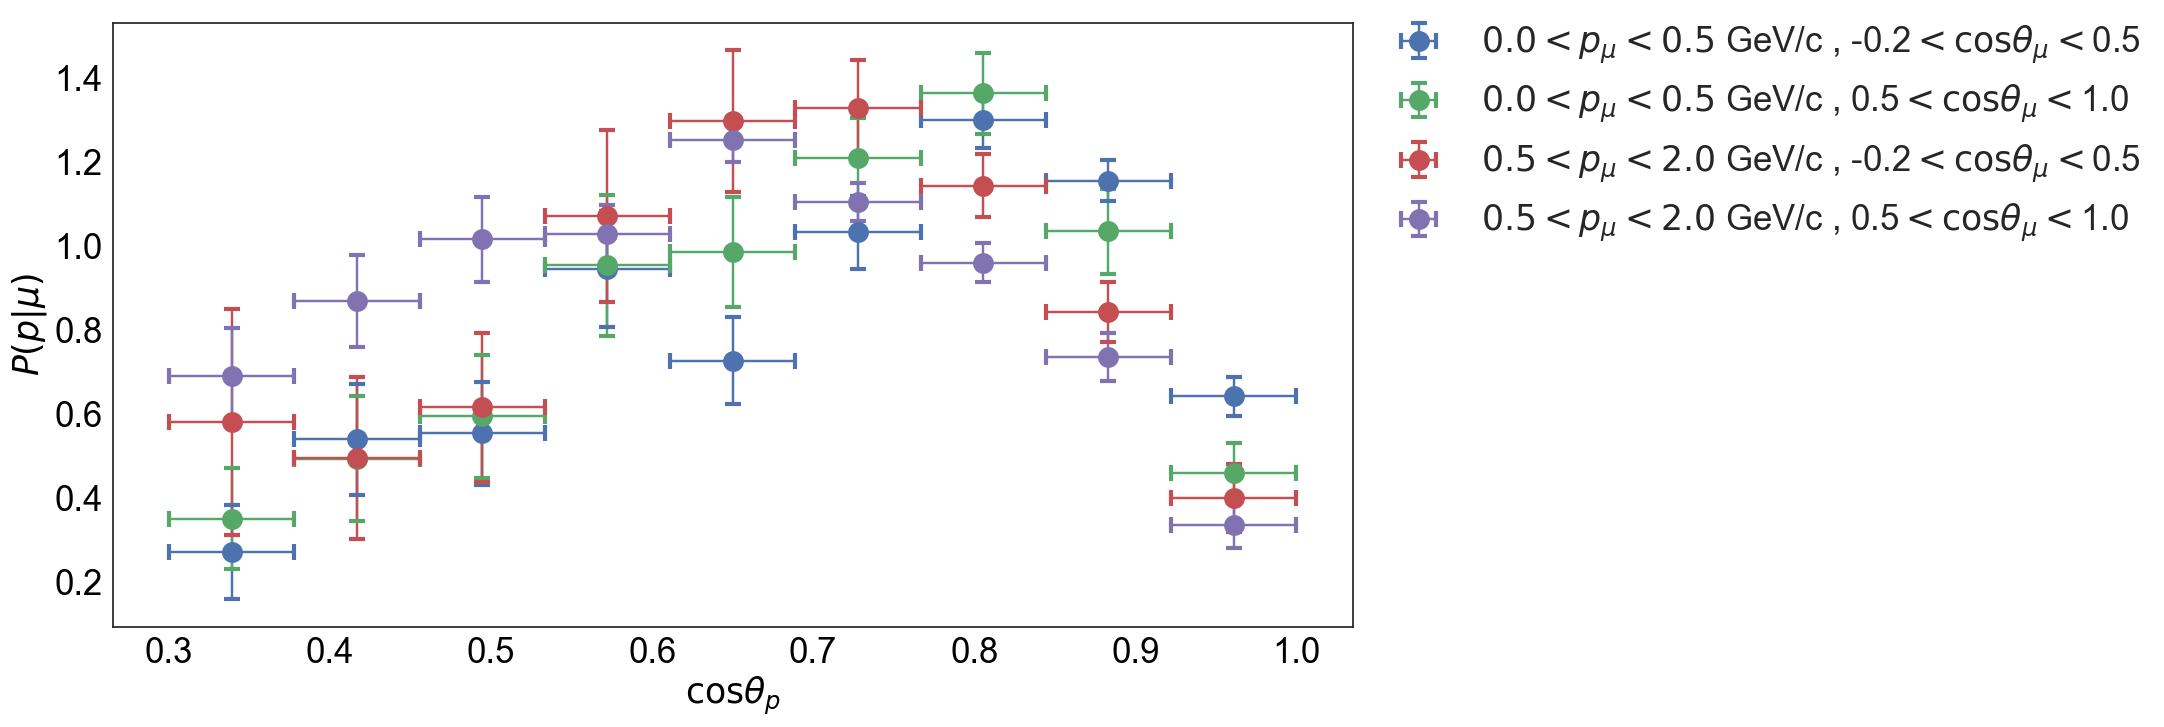

In [128]:
heff,heff_err = dict(), dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)
        genie_CC1p_muon_bin = sample_in_muon_bin(genie_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)        
        gen_muon_bin = sample_in_limits(sam=genie_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_muon_bin = gen_muon_bin[gen_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_muon_bin = sample_in_muon_bin(selected_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
        sel_muon_bin = sample_in_limits(sam=selected_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_muon_bin = sel_muon_bin[sel_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_muon_bin = float(len(sel_muon_bin))/len(gen_muon_bin)



        heff[key],heff_err[key] = [],[]
        for iPp_cos_theta in range(len(Pp_cos_theta_bins)-1):
            Pp_cos_theta_min,Pp_cos_theta_max = Pp_cos_theta_bins[iPp_cos_theta],Pp_cos_theta_bins[iPp_cos_theta+1]    
            # efficiency
            gen_proton_bin = sample_in_proton_bin(gen_muon_bin,0,2,Pp_cos_theta_min,Pp_cos_theta_max)            
            acc_proton_bin = sample_in_proton_bin(sel_muon_bin,0,2,Pp_cos_theta_min,Pp_cos_theta_max)
            Ngen = float(len(gen_proton_bin))
            Nacc = float(len(acc_proton_bin))
            heff[key].append( (1./effCC1p_muon_bin)*Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
print 'done.'

fig,ax=plt.subplots(figsize=(16,8))
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)
        ax.errorbar(x=mid_Pp,xerr=0.5*bin_width_Pp,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_\mu<%.1f$ GeV/c , %s$<\cos\theta_\mu<$%s'%(Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max))        
set_axes(ax,r'$\cos\theta_p$',r'$P(p | \mu)$')
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pp_cos_theta_efficiency_in_muon_bins.pdf',bbox_inches='tight')


# 2D efficiency

In [116]:
Pp_bins = linspace(0.3,1.,7); mid_Pp = 0.5*(Pp_bins[1:]+Pp_bins[:-1]); bin_width_Pp=(mid_Pp[1]-mid_Pp[0])
Pp_cos_theta_bins = linspace(0.2,1,7); mid_Pp_cos_theta = 0.5*(Pp_cos_theta_bins[1:]+Pp_cos_theta_bins[:-1]); bin_width_Pp_cos_theta=(mid_Pp_cos_theta[1]-mid_Pp_cos_theta[0])

heff,heff_err = dict(),  dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        key = '%d %d'%(iPmu,iPmu_cos_theta)
        genie_CC1p_muon_bin = sample_in_muon_bin(genie_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)        
        gen_muon_bin = sample_in_limits(sam=genie_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_muon_bin = gen_muon_bin[gen_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_muon_bin = sample_in_muon_bin(selected_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
        sel_muon_bin = sample_in_limits(sam=selected_CC1p_muon_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_muon_bin = sel_muon_bin[sel_muon_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_muon_bin = float(len(sel_muon_bin))/len(gen_muon_bin)

        heff[key],heff_err[key] = ones(( len(Pp_bins)-1 , len(Pp_cos_theta_bins)-1 )), ones(( len(Pp_bins)-1 , len(Pp_cos_theta_bins)-1 ))
        for iPp in range(len(Pp_bins)-1):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            for iPp_cos_theta in range(len(Pp_cos_theta_bins)-1):
                Pp_cos_theta_min,Pp_cos_theta_max = Pp_cos_theta_bins[iPp_cos_theta],Pp_cos_theta_bins[iPp_cos_theta+1]    
                # efficiency
                gen_proton_bin = sample_in_proton_bin(gen_muon_bin,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)            
                acc_proton_bin = sample_in_proton_bin(sel_muon_bin,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
                Ngen = float(len(gen_proton_bin))
                Nacc = float(len(acc_proton_bin))
                heff[key][iPp][iPp_cos_theta] = ( (Nacc/Ngen if Ngen>0 else 0) ) * (1./effCC1p_muon_bin)
                heff_err[key][iPp][iPp_cos_theta] = (heff[key][iPp][iPp_cos_theta]*np.sqrt( (1./Nacc if Nacc>0 else 0) + (1./Ngen if Ngen>0 else 0)) )
print 'done computing efficiency.'

done computing efficiency.


In [120]:
# now ask, in each bin,
# what is the probability that 
# all of the efficiencies were sampled from the same number?
eff_arr = []; w_arr = []
chi2 = 0; ndf=-1;
chi2_ndf = ones((len(Pp_bins)-1 ,len(Pp_cos_theta_bins)-1 ))
for i in range(len(Pp_bins)-1):
    for j in range(len(Pp_cos_theta_bins)-1):

        w_00 = 1./np.square(heff_err['0 0'][i][j])   if heff_err['0 0'][i][j]>0 else 0
        w_01 = 1./np.square(heff_err['0 1'][i][j])   if heff_err['0 1'][i][j]>0 else 0
        w_10 = 1./np.square(heff_err['1 0'][i][j])   if heff_err['1 0'][i][j]>0 else 0
        w_11 = 1./np.square(heff_err['1 1'][i][j])   if heff_err['1 1'][i][j]>0 else 0
        
        if heff['0 0'][i][j]>0: eff_arr.append(heff['0 0'][i][j]); w_arr.append(w_00)
        if heff['0 1'][i][j]>0: eff_arr.append(heff['0 1'][i][j]); w_arr.append(w_01)
        if heff['1 0'][i][j]>0: eff_arr.append(heff['1 0'][i][j]); w_arr.append(w_10)
        if heff['1 1'][i][j]>0: eff_arr.append(heff['1 1'][i][j]); w_arr.append(w_01)
        
        if w_00+w_01+w_10+w_11==0: mean_ij = np.average(eff_arr)
        else: mean_ij = np.average(eff_arr,weights=w_arr)
        
        if heff['0 0'][i][j]>0: chi2 += np.square(heff['0 0'][i][j]-mean_ij)*w_00; ndf+=1
        if heff['0 1'][i][j]>0: chi2 += np.square(heff['0 1'][i][j]-mean_ij)*w_01; ndf+=1
        if heff['1 0'][i][j]>0: chi2 += np.square(heff['1 0'][i][j]-mean_ij)*w_10; ndf+=1
        if heff['1 1'][i][j]>0: chi2 += np.square(heff['1 1'][i][j]-mean_ij)*w_11; ndf+=1

#         print "heff['0 0'],heff['0 1'],heff['1 0'],heff['1 1']):",heff['0 0'][i][j],heff['0 1'][i][j],heff['1 0'][i][j],heff['1 1'][i][j]
#         print "heff_err['0 0'],heff_err['0 1'],heff_err['1 0'],heff_err['1 1']):",heff_err['0 0'][i][j],heff_err['0 1'][i][j],heff_err['1 0'][i][j],heff_err['1 1'][i][j]
#         print "chi2_00 , chi2_01 , chi2_10 , chi2_11:",chi2_00 ,chi2_01 ,chi2_10 ,chi2_11
#         print 'i,j: ',i,j,', chi2:',chi2
        chi2_ndf[i][j] = chi2/ndf
print 'done.'
# print chi2_ndf

done.


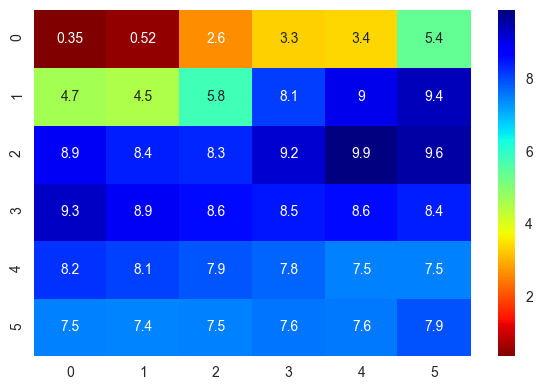

In [121]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)        
sns.heatmap( chi2_ndf , cmap='jet_r', annot=True)
plt.tight_layout()

## muon efficeincy in proton bins

In [5]:
large_bins_Pp_min = np.array([0.3,0.7])
large_bins_Pp_max = np.array([large_bins_Pp_min[1],2])
large_bins_Pp_centers = 0.5*(large_bins_Pp_min+large_bins_Pp_max)
large_bins_Pp_cos_theta_min = np.array([0.,0.75])
large_bins_Pp_cos_theta_max = np.array([large_bins_Pp_cos_theta_min[1],1])
large_bins_Pp_cos_theta_centers = 0.5*(large_bins_Pp_cos_theta_min+large_bins_Pp_cos_theta_max)

In [137]:
Pmu_bins = linspace(0.2,1.3,8); mid_Pmu = 0.5*(Pmu_bins[1:]+Pmu_bins[:-1]); bin_width_Pmu=(mid_Pmu[1]-mid_Pmu[0])
Pmu_cos_theta_bins = linspace(-0.1,1,8); mid_Pmu_cos_theta = 0.5*(Pmu_cos_theta_bins[1:]+Pmu_cos_theta_bins[:-1]); bin_width_Pmu_cos_theta=(mid_Pmu_cos_theta[1]-mid_Pmu_cos_theta[0])

In [133]:
h_mu_eff,h_mu_eff_err = dict(),dict()
h_mu_gen,h_mu_acc = dict(),dict()
heff,heff_err = dict(), dict()
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)

        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        gen_proton_bin = sample_in_limits(sam=genie_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_proton_bin = gen_proton_bin[gen_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        sel_proton_bin = sample_in_limits(sam=selected_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_proton_bin = sel_proton_bin[sel_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_proton_bin = float(len(sel_proton_bin))/len(gen_proton_bin)


#         genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
#         selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
#         print len(genie_CC1p_proton_bin),'gen. events in bin, ',len(selected_CC1p_proton_bin),'reco. events in bin'
#         effCC1p_proton_bin = float(len(selected_CC1p_proton_bin))/len(genie_CC1p_proton_bin)

        heff[key],heff_err[key] = [],[]
        h_mu_gen[key],h_mu_acc[key] = [],[]        
        for iPmu in range(len(Pmu_bins)-1):
            Pmu_min,Pmu_max = Pmu_bins[iPmu],Pmu_bins[iPmu+1]    
            # efficiency
            gen_muon_bin = sample_in_muon_bin(gen_proton_bin,Pmu_min,Pmu_max,-1,1)            
            acc_muon_bin = sample_in_muon_bin(sel_proton_bin,Pmu_min,Pmu_max,-1,1)
            Ngen = float(len(gen_muon_bin))
            Nacc = float(len(acc_muon_bin))
            h_mu_gen[key].append( Ngen )
            h_mu_acc[key].append( Nacc )
            heff[key].append( Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
        heff[key] = np.array(heff[key]) * 1./effCC1p_proton_bin;
        heff_err[key] = np.array(heff_err[key]) * 1./effCC1p_proton_bin;

#         print heff[key]
print 'done.'

done.


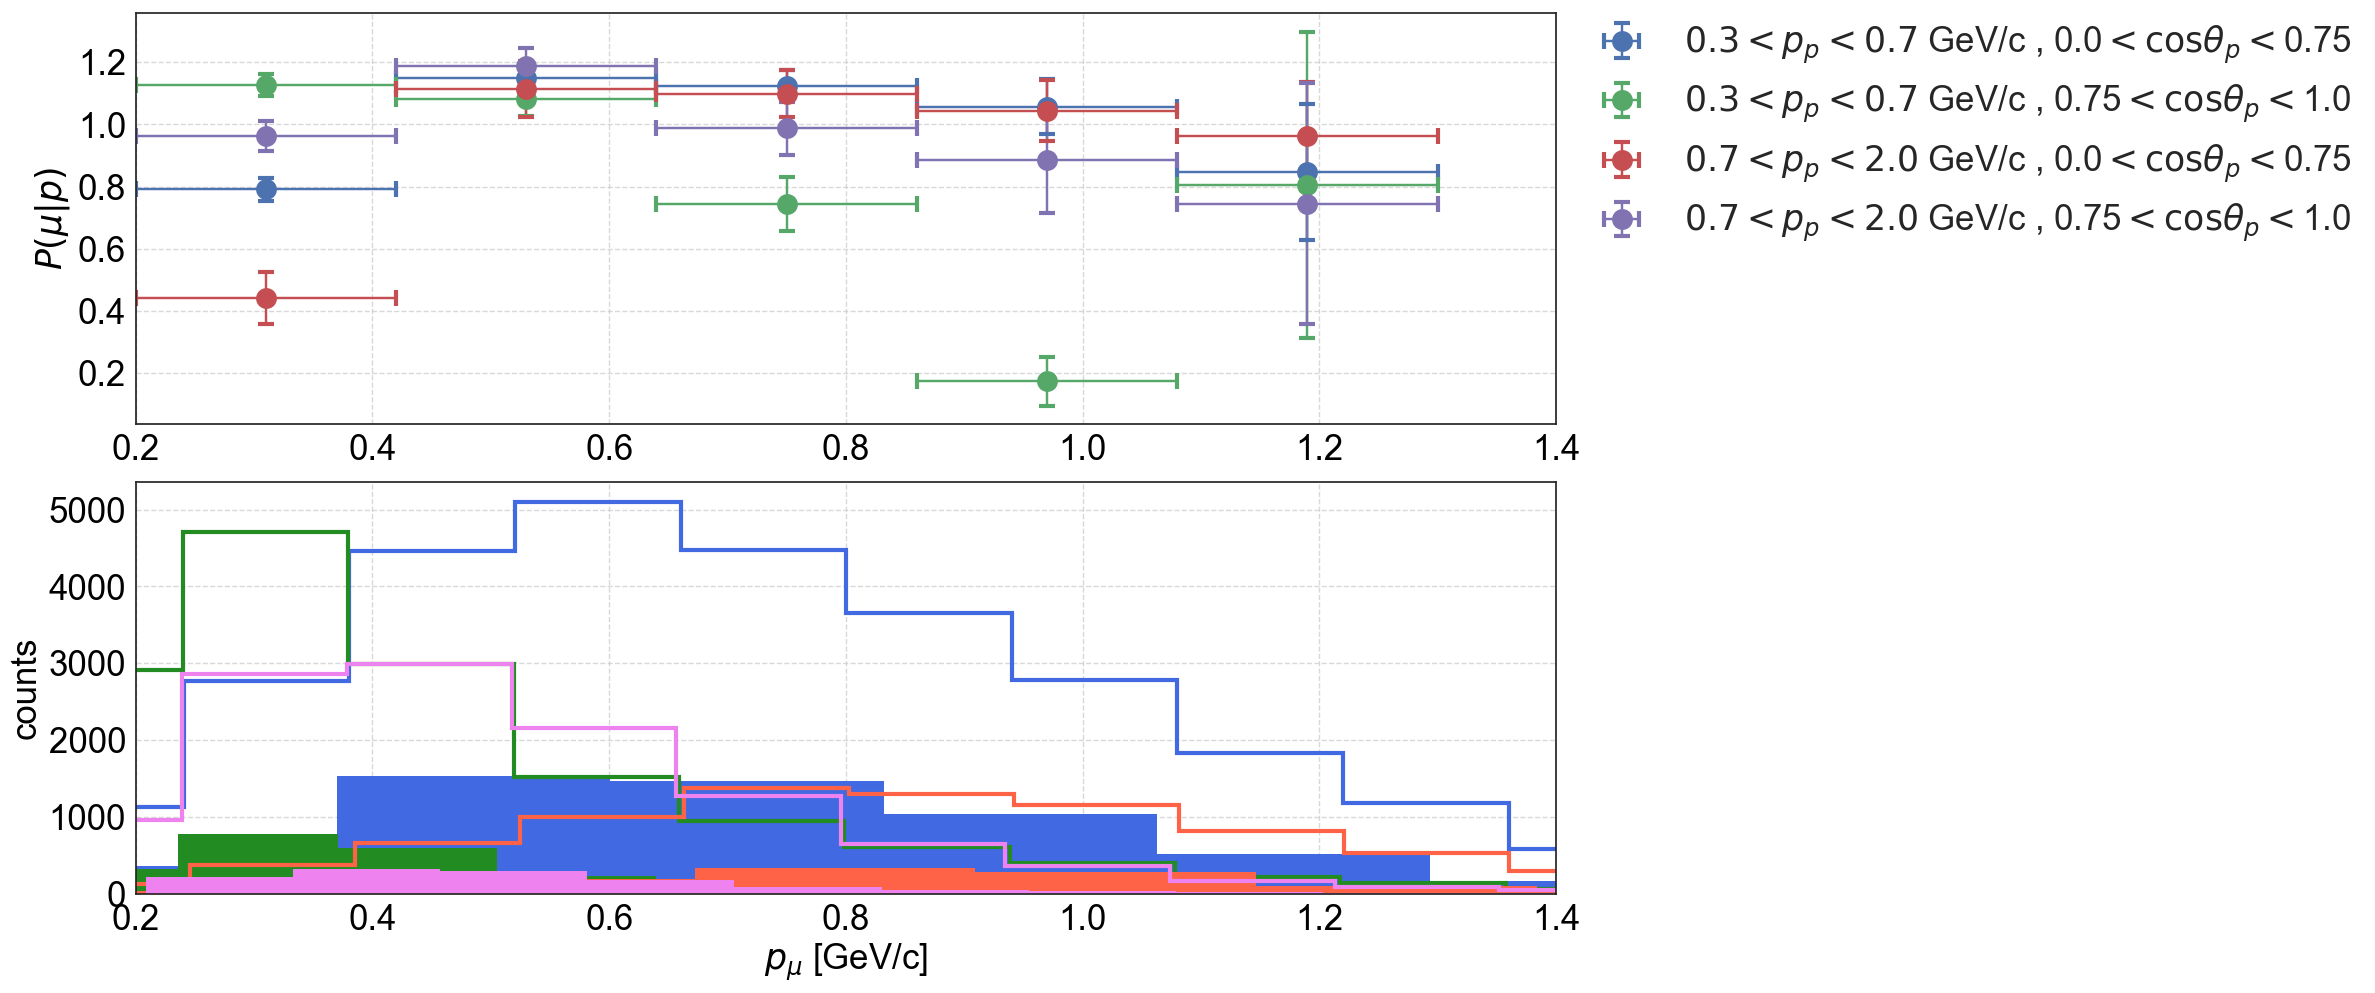

In [134]:
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(2,1,1)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu,xerr=0.5*bin_width_Pmu,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_p<%.1f$ GeV/c , %s$<\cos\theta_p<$%s'%(Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max))        
set_axes(ax,'',r'$P( \mu  | p)$',do_add_grid=True,xlim=(0.2,1.4))
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

colors = ['royalblue','forestgreen','tomato','violet']
i_c=0
ax = fig.add_subplot(2,1,2)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        color = colors[i_c]; i_c = i_c + 1 ; 
        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        plt.hist(genie_CC1p_proton_bin['truth_Pmu'],histtype='step',linewidth=3,color=color)
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        plt.hist(selected_CC1p_proton_bin['truth_Pmu'],histtype='stepfilled',linewidth=3,color=color)

set_axes(ax,r'$p_\mu$ [GeV/c]',r'counts',do_add_grid=True,xlim=(0.2,1.4))
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

plt.tight_layout()

done.


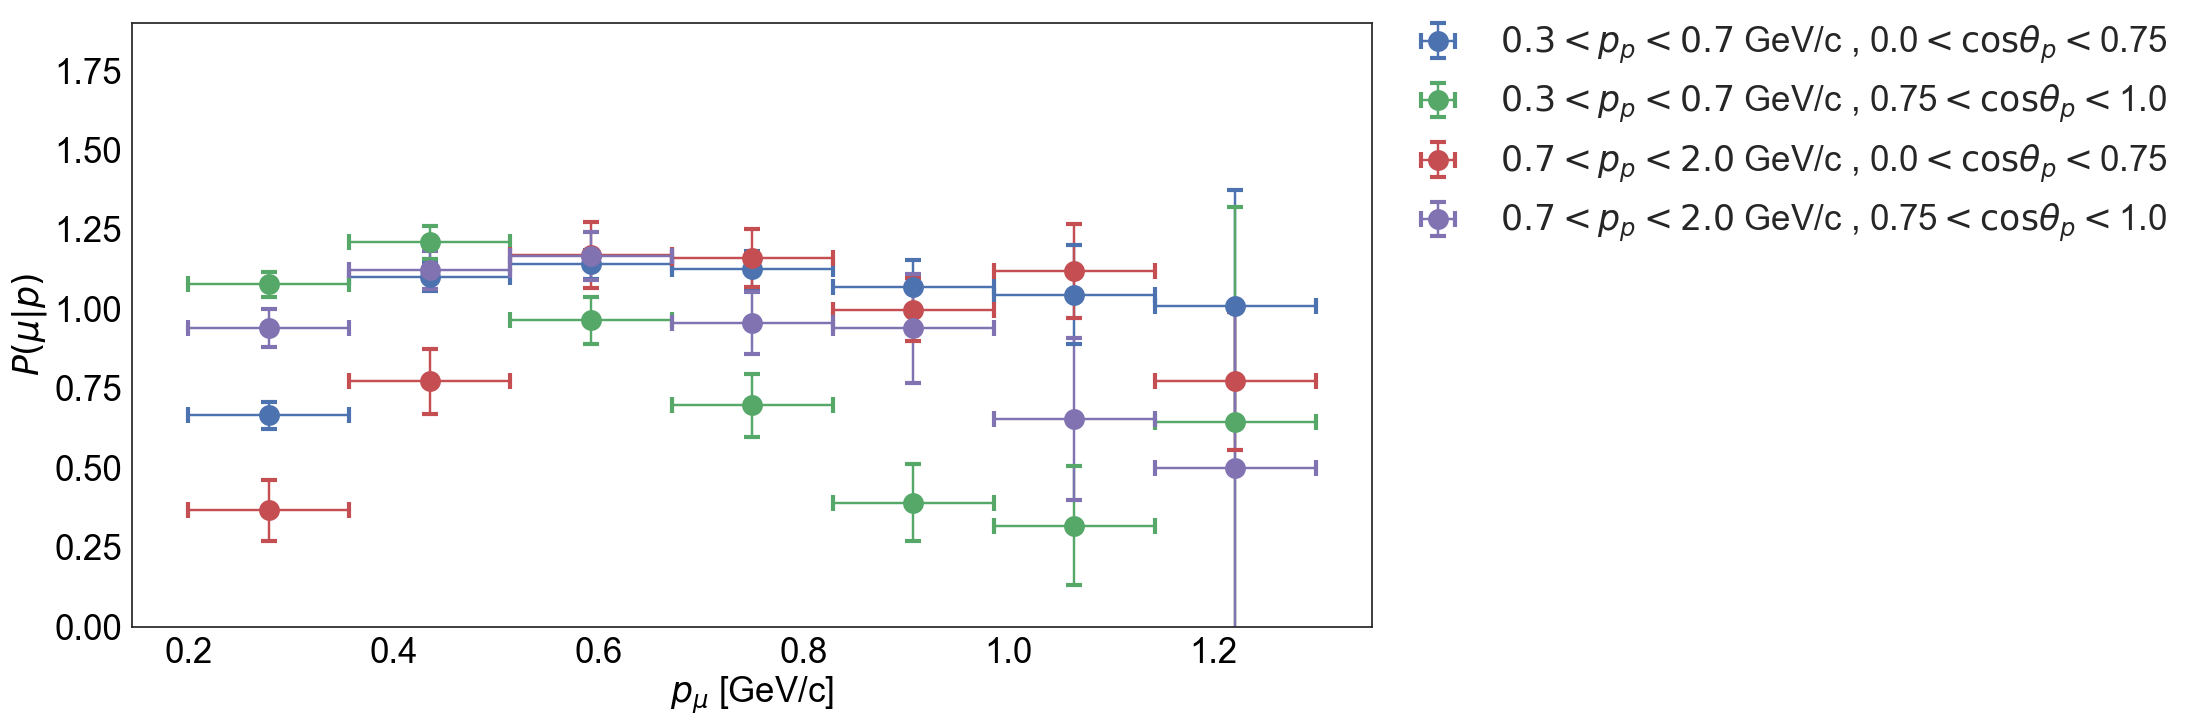

In [142]:
h_mu_eff,h_mu_eff_err = dict(),dict()
h_mu_gen,h_mu_acc = dict(),dict()
heff,heff_err = dict(), dict()
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)

        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        gen_proton_bin = sample_in_limits(sam=genie_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_proton_bin = gen_proton_bin[gen_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        sel_proton_bin = sample_in_limits(sam=selected_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_proton_bin = sel_proton_bin[sel_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_proton_bin = float(len(sel_proton_bin))/len(gen_proton_bin)



        heff[key],heff_err[key] = [],[]
        h_mu_gen[key],h_mu_acc[key] = [],[]        
        for iPmu in range(len(Pmu_bins)-1):
            Pmu_min,Pmu_max = Pmu_bins[iPmu],Pmu_bins[iPmu+1]    
            # efficiency
            gen_muon_bin = sample_in_muon_bin(gen_proton_bin,Pmu_min,Pmu_max,-1,1)            
            acc_muon_bin = sample_in_muon_bin(sel_proton_bin,Pmu_min,Pmu_max,-1,1)
            Ngen = float(len(gen_muon_bin))
            Nacc = float(len(acc_muon_bin))
            h_mu_gen[key].append( Ngen )
            h_mu_acc[key].append( Nacc )
            heff[key].append( Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
        heff[key] = np.array(heff[key]) * 1./effCC1p_proton_bin;
        heff_err[key] = np.array(heff_err[key]) * 1./effCC1p_proton_bin;

#         print heff[key]
print 'done.'
fig,ax=plt.subplots(figsize=(16,8))
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu,xerr=0.5*bin_width_Pmu,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_p<%.1f$ GeV/c , %s$<\cos\theta_p<$%s'%(Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max))        
set_axes(ax,r'$p_\mu$ [GeV/c]',r'$P( \mu  | p)$'
         ,ylim=(0,1.9)
        )
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pmu_efficiency_in_proton_bins.pdf',bbox_inches='tight')

done.


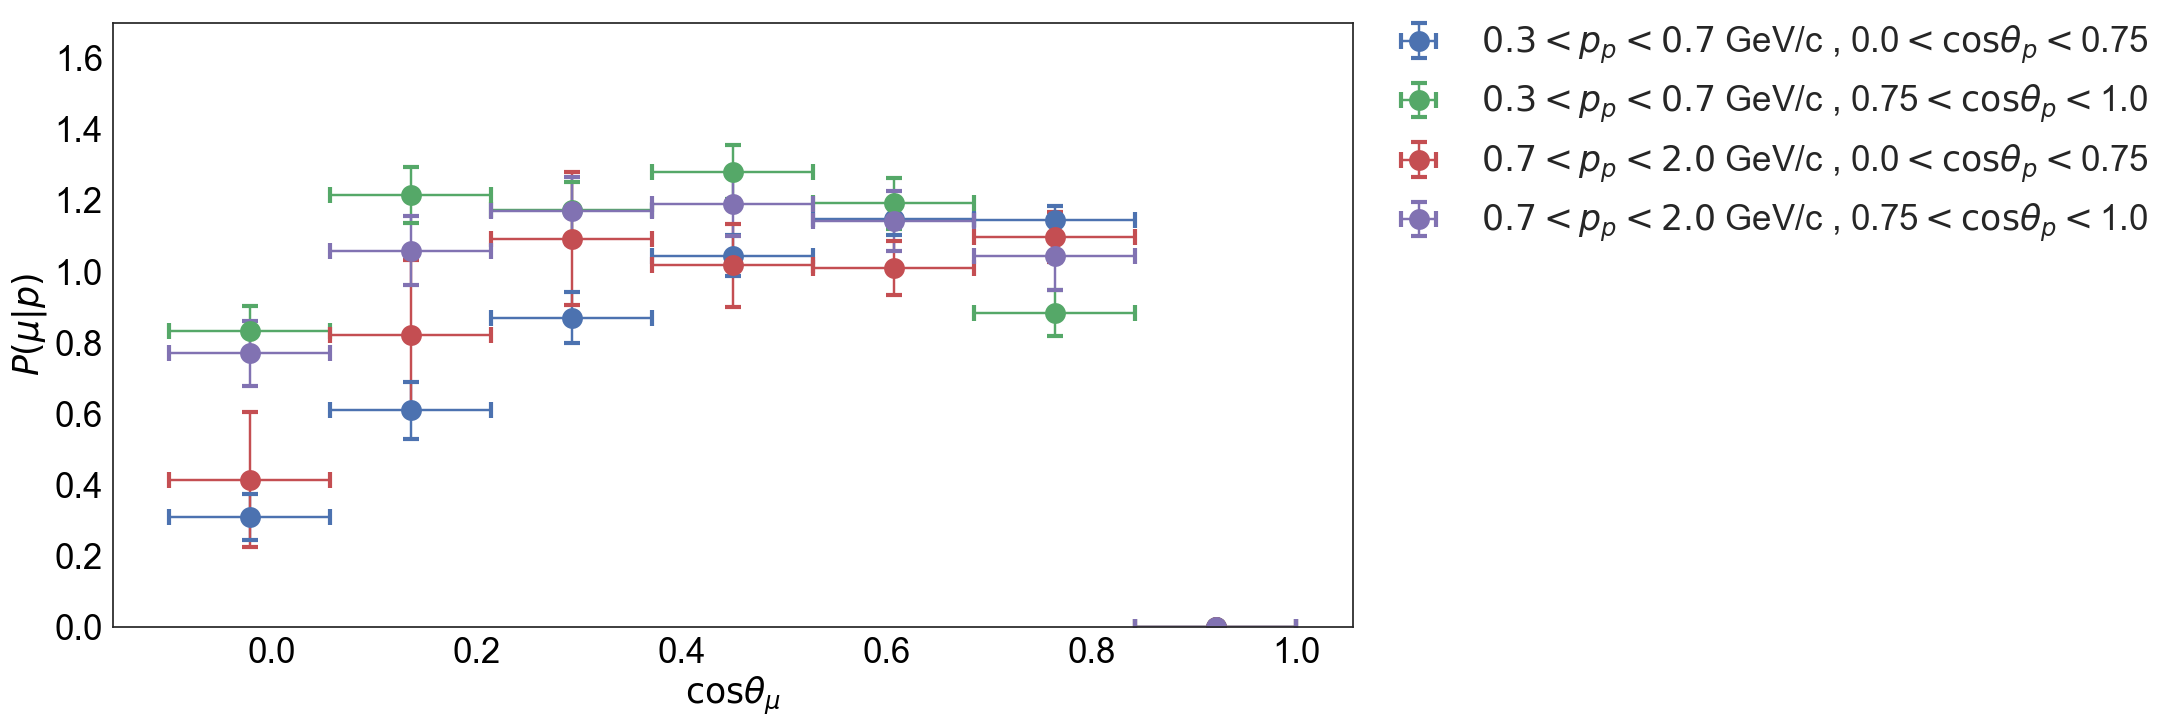

In [139]:
h_mu_eff,h_mu_eff_err = dict(),dict()
h_mu_gen,h_mu_acc = dict(),dict()
heff,heff_err = dict(), dict()
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)

        genie_CC1p_proton_bin = sample_in_proton_bin(genie_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        gen_proton_bin = sample_in_limits(sam=genie_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        gen_proton_bin = gen_proton_bin[gen_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]
        
        selected_CC1p_proton_bin = sample_in_proton_bin(selected_CC1p,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
        sel_proton_bin = sample_in_limits(sam=selected_CC1p_proton_bin
                                 ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'                                 
                                 ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
        sel_proton_bin = sel_proton_bin[sel_proton_bin['truth_Pmu_cos_theta']<Bins['cos(theta(mu))'][-2]]

        effCC1p_proton_bin = float(len(sel_proton_bin))/len(gen_proton_bin)


        heff[key],heff_err[key] = [],[]
        h_mu_gen[key],h_mu_acc[key] = [],[]
        for iPmu_cos_theta in range(len(Pmu_cos_theta_bins)-1):
            Pmu_cos_theta_min,Pmu_cos_theta_max = Pmu_cos_theta_bins[iPmu_cos_theta],Pmu_cos_theta_bins[iPmu_cos_theta+1]    
            # efficiency
            gen_muon_bin = sample_in_muon_bin(gen_proton_bin,0,2,Pmu_cos_theta_min,Pmu_cos_theta_max)            
            acc_muon_bin = sample_in_muon_bin(sel_proton_bin,0,2,Pmu_cos_theta_min,Pmu_cos_theta_max)
            Ngen = float(len(gen_muon_bin))
            Nacc = float(len(acc_muon_bin))
            h_mu_gen[key].append( Ngen )
            h_mu_acc[key].append( Nacc )
            heff[key].append( (1./effCC1p_proton_bin)*Nacc/Ngen if Ngen>0 else 0 )
            heff_err[key].append( heff[key][-1]*np.sqrt( (1./Nacc if Nacc>0 else 0) 
                                                    + (1./Ngen if Ngen>0 else 0)) )        
#         print heff[key]
print 'done.'
fig,ax=plt.subplots(figsize=(16,8))
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu_cos_theta,xerr=0.5*bin_width_Pmu_cos_theta,y=heff[key],yerr=heff_err[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_p<%.1f$ GeV/c , %s$<\cos\theta_p<$%s'%(Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max))        
set_axes(ax,r'$\cos\theta_\mu$',r'$P( \mu  | p)$',ylim=(0,1.7))
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pmu_cos_theta_efficiency_in_proton_bins.pdf',bbox_inches='tight')

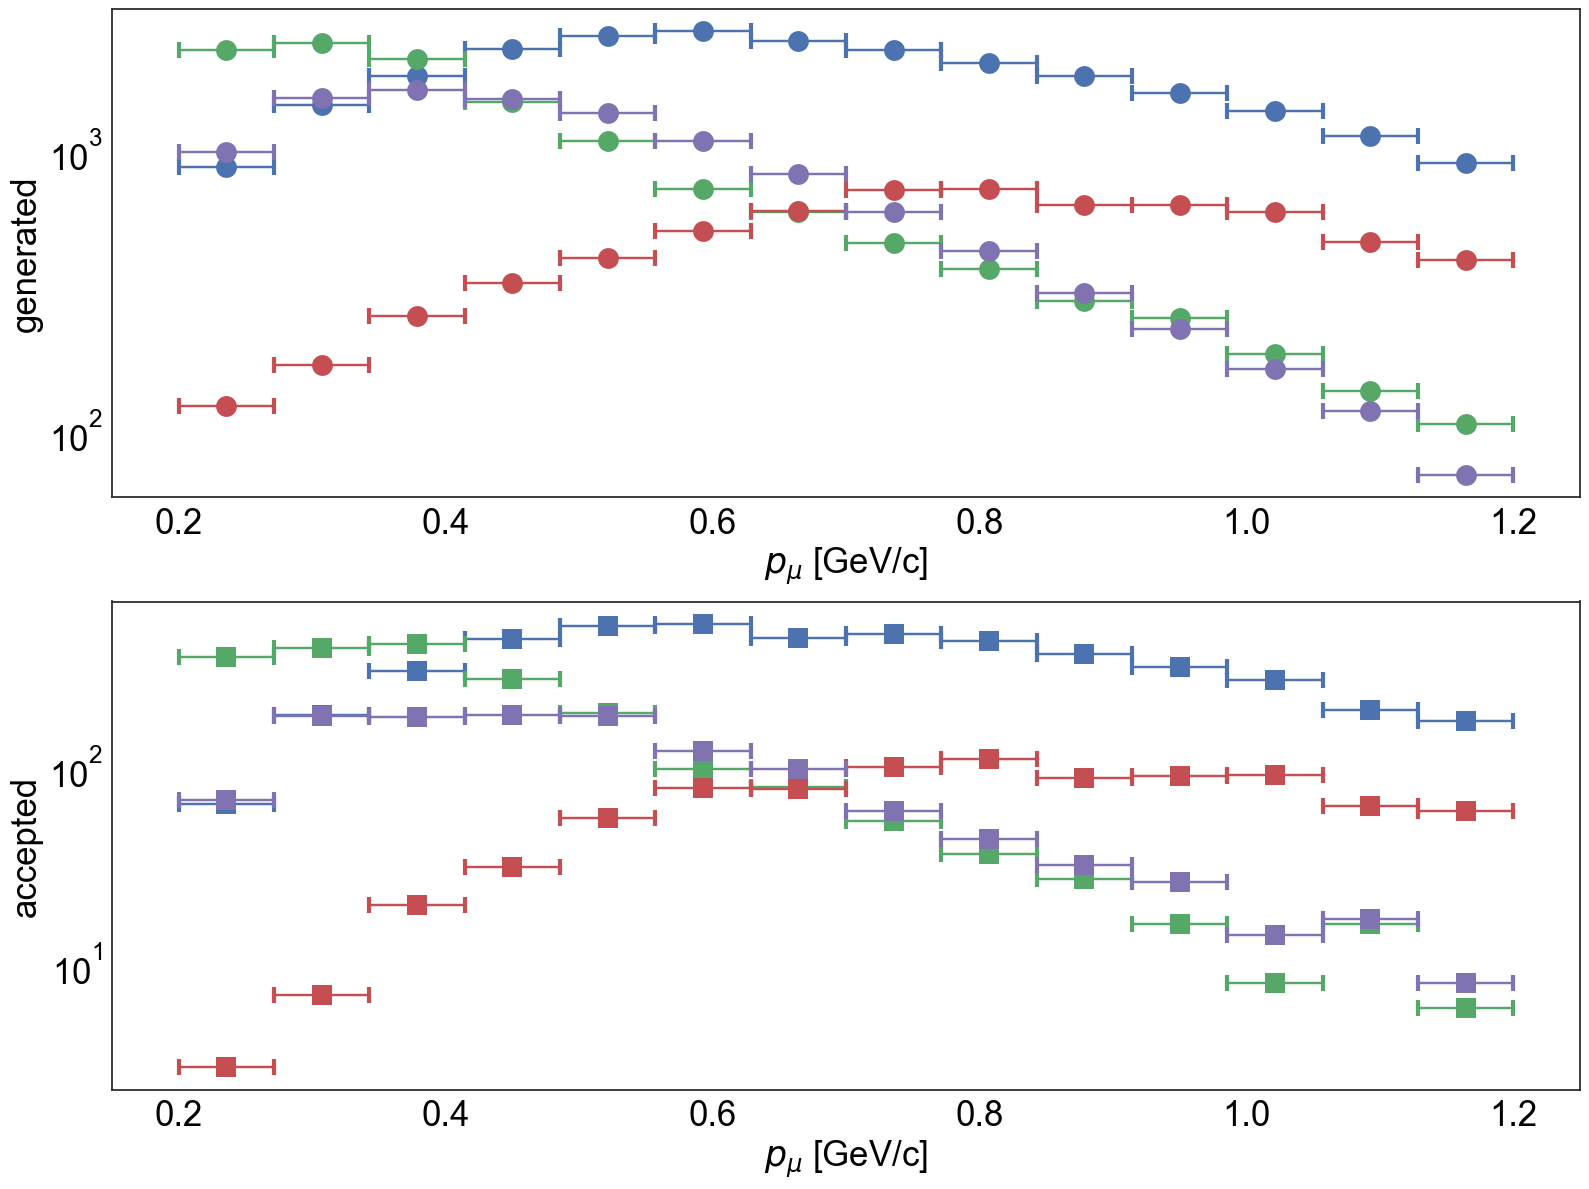

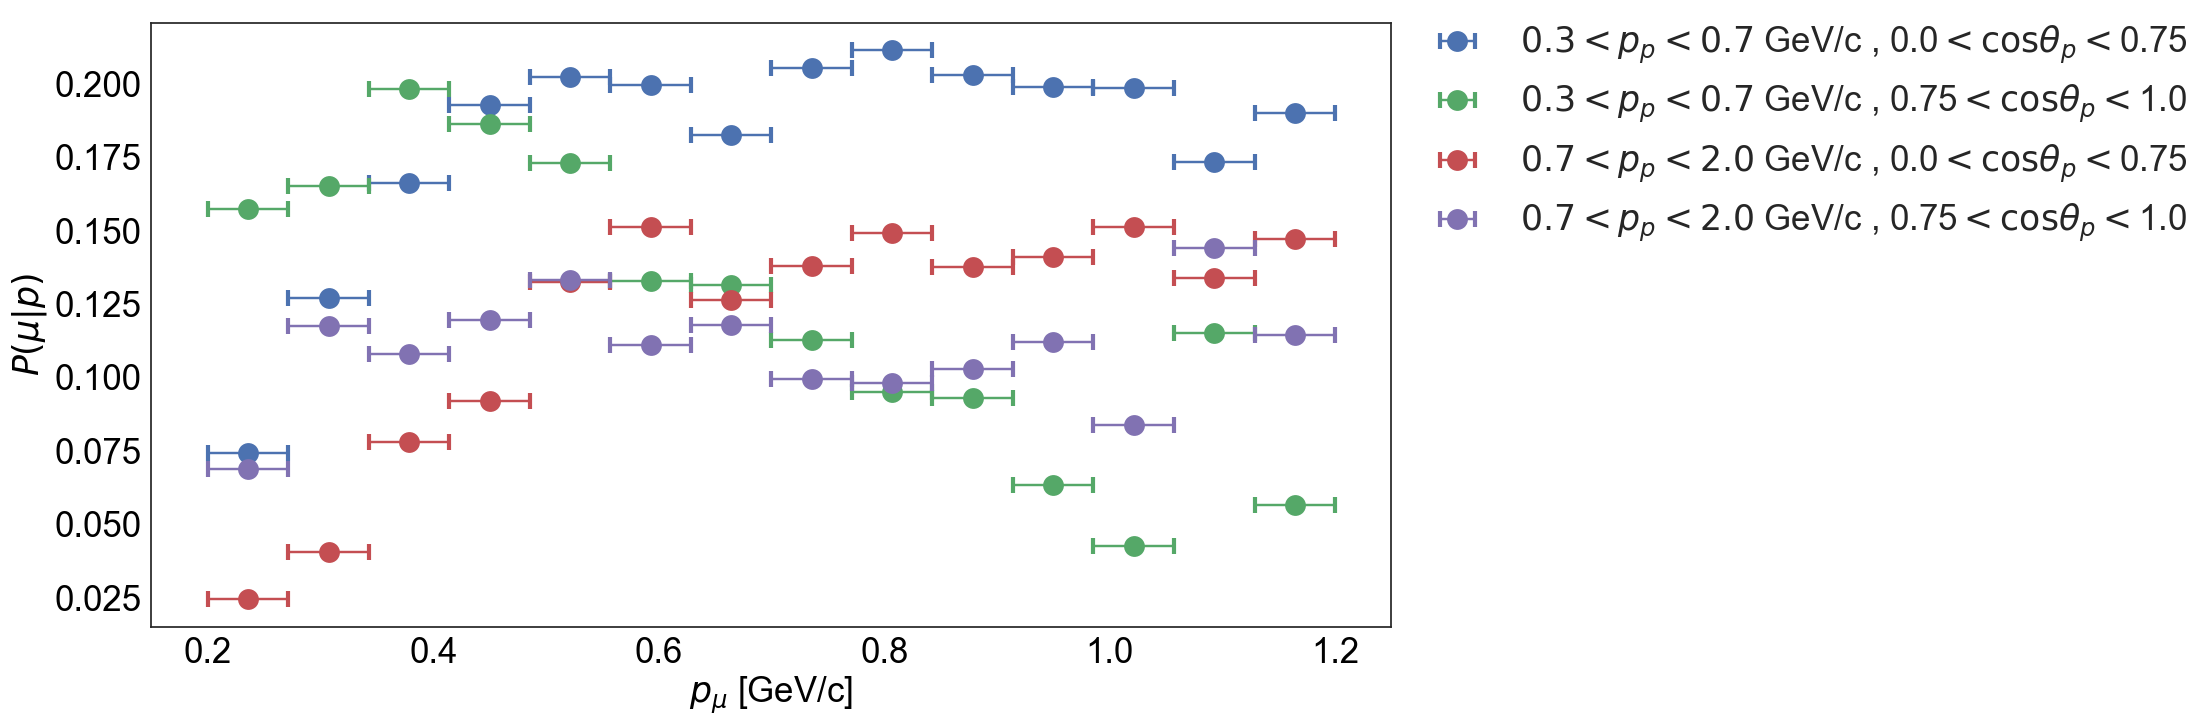

In [27]:
fig=plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,1,1)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu,xerr=0.5*bin_width_Pmu,y=h_mu_gen[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label='generated')
set_axes(ax,r'$p_\mu$ [GeV/c]',r'generated')
ax.set_yscale('log')

ax = fig.add_subplot(2,1,2)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)        
        ax.errorbar(x=mid_Pmu,xerr=0.5*bin_width_Pmu,y=h_mu_acc[key]
                    ,fmt='s',markersize=15,capsize=6,capthick=3
                    ,label='accepted')
set_axes(ax,r'$p_\mu$ [GeV/c]',r'accepted')
ax.set_yscale('log')
plt.tight_layout()




fig,ax=plt.subplots(figsize=(16,8))
heff_tmp = dict()
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        heff_tmp[key] = np.array(h_mu_acc[key])/np.array(h_mu_gen[key])
        ax.errorbar(x=mid_Pmu,xerr=0.5*bin_width_Pmu,y=heff_tmp[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label=r'$%.1f<p_p<%.1f$ GeV/c , %s$<\cos\theta_p<$%s'%(Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max))        
set_axes(ax,r'$p_\mu$ [GeV/c]',r'$P( \mu  | p)$')#,ylim=(0,1.9)
ax.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)
plt.savefig(figures_path+'Pmu_efficiency_in_proton_bins.pdf',bbox_inches='tight')

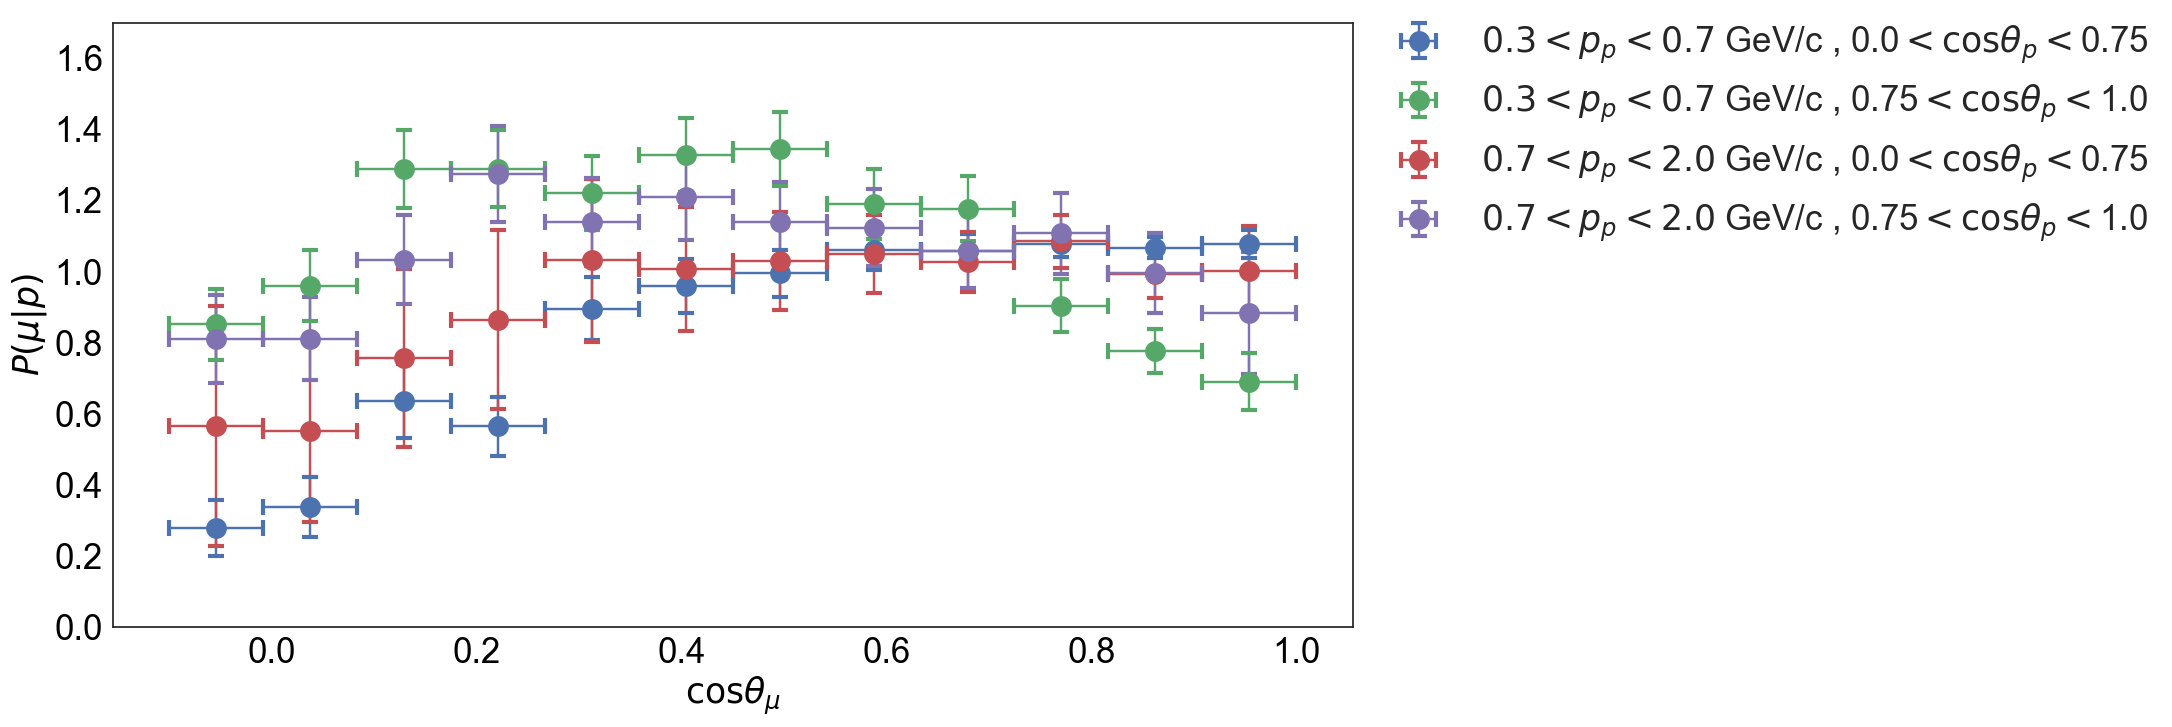

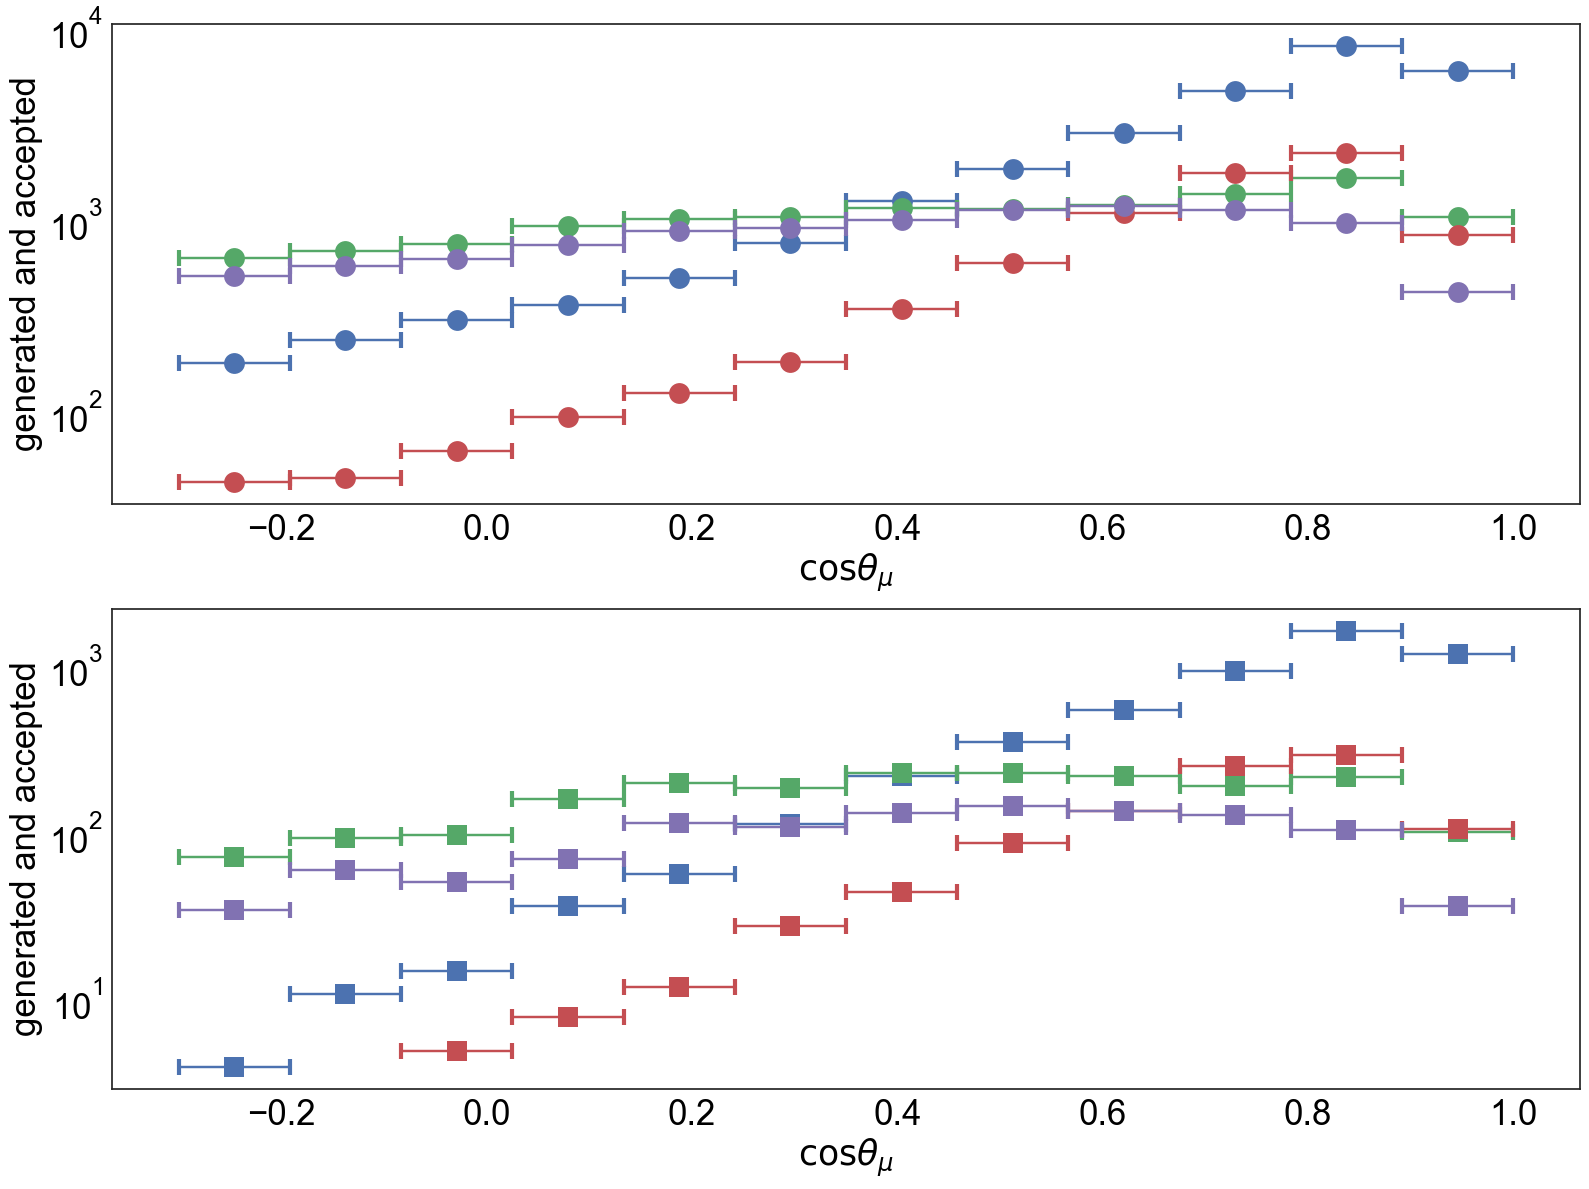

In [36]:
fig=plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,1,1)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)
        ax.errorbar(x=mid_Pmu_cos_theta,xerr=0.5*bin_width_Pmu_cos_theta,y=h_mu_gen[key]
                    ,fmt='o',markersize=15,capsize=6,capthick=3
                    ,label='generated')
set_axes(ax,r'$\cos\theta_\mu$',r'generated')
ax.set_yscale('log')

ax = fig.add_subplot(2,1,2)
for iPp,(Pp_min,Pp_max) in enumerate(zip(large_bins_Pp_min,large_bins_Pp_max)):
    for iPp_cos_theta,(Pp_cos_theta_min,Pp_cos_theta_max) in enumerate(zip(large_bins_Pp_cos_theta_min,large_bins_Pp_cos_theta_max)):
        key = 'iPp %d iPp_cos_theta %d'%(iPp,iPp_cos_theta)        
        ax.errorbar(x=mid_Pmu_cos_theta,xerr=0.5*bin_width_Pmu_cos_theta,y=h_mu_acc[key]
                    ,fmt='s',markersize=15,capsize=6,capthick=3
                    ,label='accepted')
set_axes(ax,r'$\cos\theta_\mu$',r'accepted')
ax.set_yscale('log')
plt.tight_layout()

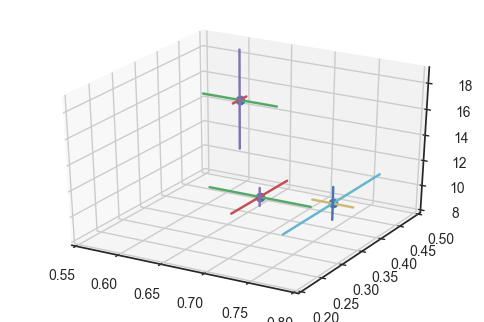

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')



#data
fx = [0.673574075,0.727952994,0.6746285]
fy = [0.331657721,0.447817839,0.37733386]
fz = [18.13629648,8.620699842,9.807536512]

#error data
xerror = [0.041504064,0.02402152,0.059383144]
yerror = [0.015649804,0.12643117,0.068676131]
zerror = [3.677693713,1.345712547,0.724095592]

#plot points
ax.plot(fx, fy, fz, linestyle="None", marker="o")

#plot errorbars
for i in np.arange(0, len(fx)):
    ax.plot([fx[i]+xerror[i], fx[i]-xerror[i]], [fy[i], fy[i]], [fz[i], fz[i]], marker="_")
    ax.plot([fx[i], fx[i]], [fy[i]+yerror[i], fy[i]-yerror[i]], [fz[i], fz[i]], marker="_")
    ax.plot([fx[i], fx[i]], [fy[i], fy[i]], [fz[i]+zerror[i], fz[i]-zerror[i]], marker="_")

#configure axes
ax.set_xlim3d(0.55, 0.8)
ax.set_ylim3d(0.2, 0.5)
ax.set_zlim3d(8, 19)

plt.show()

## 2D efficiency

In [5]:
h_p_eff,h_p_eff_err = dict(),dict()
h_p_gen,h_p_acc = dict(),dict()
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        selected_CC1p_muon_bin = sample_in_muon_bin(selected_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
        genie_CC1p_muon_bin = sample_in_muon_bin(genie_CC1p,Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)        

        hCC1p_muon_bins[iPmu][iPmu_cos_theta] = len(selected_CC1p_muon_bin)
        
        # now check the proton acceptance in this muon-kinematics bin
        hgen,hacc,heff,heff_err = np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p)),np.zeros((nx_p,ny_p))
        total_len_acc_proton_bin = 0
        for iPp in range(nx_p):
            Pp_min,Pp_max = Pp_bins[iPp],Pp_bins[iPp+1]    
            for iPp_cos_theta in range(ny_p):
                Pp_cos_theta_min,Pp_cos_theta_max = Pp_cos_theta_bins[iPp_cos_theta],Pp_cos_theta_bins[iPp_cos_theta+1]        
                # efficiency
                gen_proton_bin = sample_in_proton_bin(genie_CC1p_muon_bin,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)            
                hgen[iPp][iPp_cos_theta] = len(gen_proton_bin)        
                
                acc_proton_bin = sample_in_proton_bin(selected_CC1p_muon_bin,Pp_min,Pp_max,Pp_cos_theta_min,Pp_cos_theta_max)
                hacc[iPp][iPp_cos_theta] = len(acc_proton_bin)        
                heff[iPp][iPp_cos_theta] = float(hacc[iPp][iPp_cos_theta])/(hgen[iPp][iPp_cos_theta] if hgen[iPp][iPp_cos_theta]>0 else 1)
                heff_err[iPp][iPp_cos_theta] = heff[iPp][iPp_cos_theta]*np.sqrt( (1./hgen[iPp][iPp_cos_theta] 
                                                                                  if hgen[iPp][iPp_cos_theta] else 0)                                                                
                                                                                + (1./hacc[iPp][iPp_cos_theta] 
                                                                                   if hacc[iPp][iPp_cos_theta] else 0) )
        h_p_gen['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)] = hgen.T
        h_p_acc['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)] = hacc.T

        h_p_eff['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)] = heff.T
        h_p_eff_err['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)] = heff_err.T
print 'done.'

done.


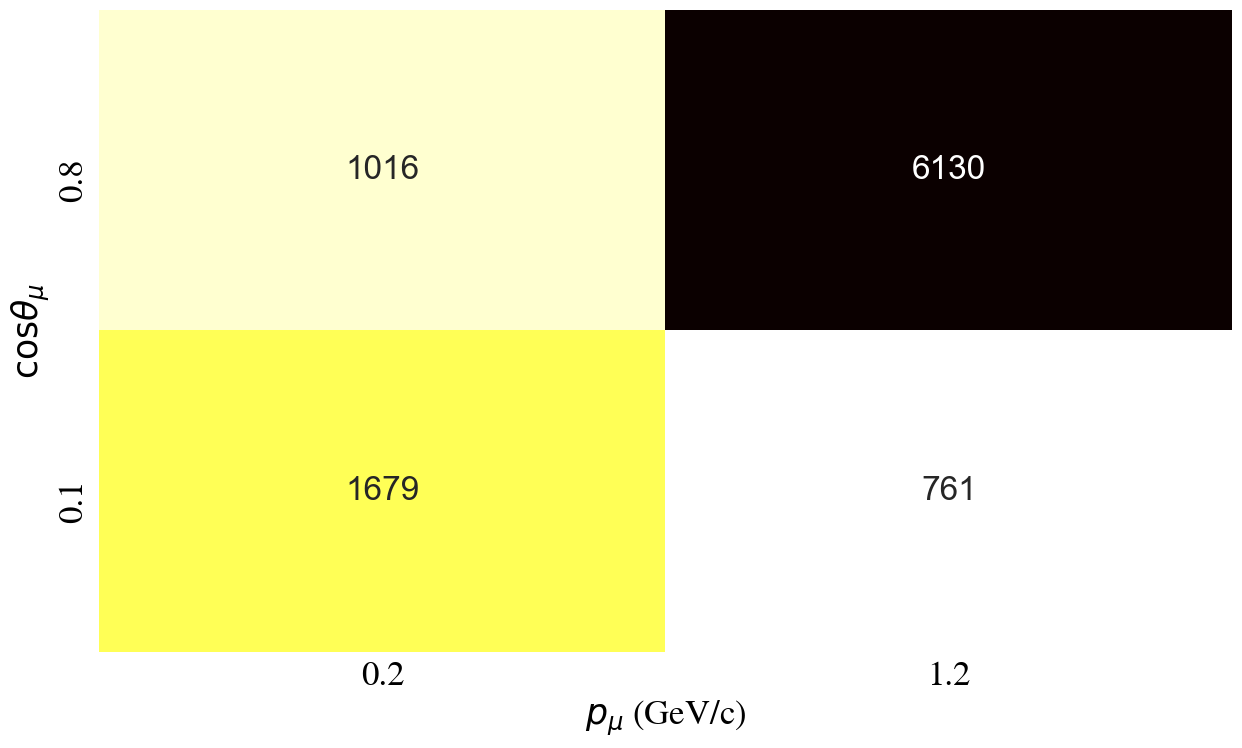

In [6]:
fig = plt.figure(figsize=(12.944,8))
ax = fig.add_subplot(1,1,1)
sns.set(font_scale=2);
sns.heatmap(hCC1p_muon_bins.T.astype(np.int),annot=True,cmap='hot_r',fmt="d"         
            ,xticklabels=["%.1f"%tick for tick in large_bins_Pmu_centers]
            ,yticklabels=["%.1f"%tick for tick in large_bins_Pmu_cos_theta_centers]
            ,cbar=False)
set_axes(ax,r'$p_\mu$ (GeV/c)',r'$\cos\theta_\mu$')
ax.invert_yaxis()
plt.tight_layout()

Integral: 1.64258881833
Integral: 1.63208343552
Integral: 1.72141573002
Integral: 1.91138815859


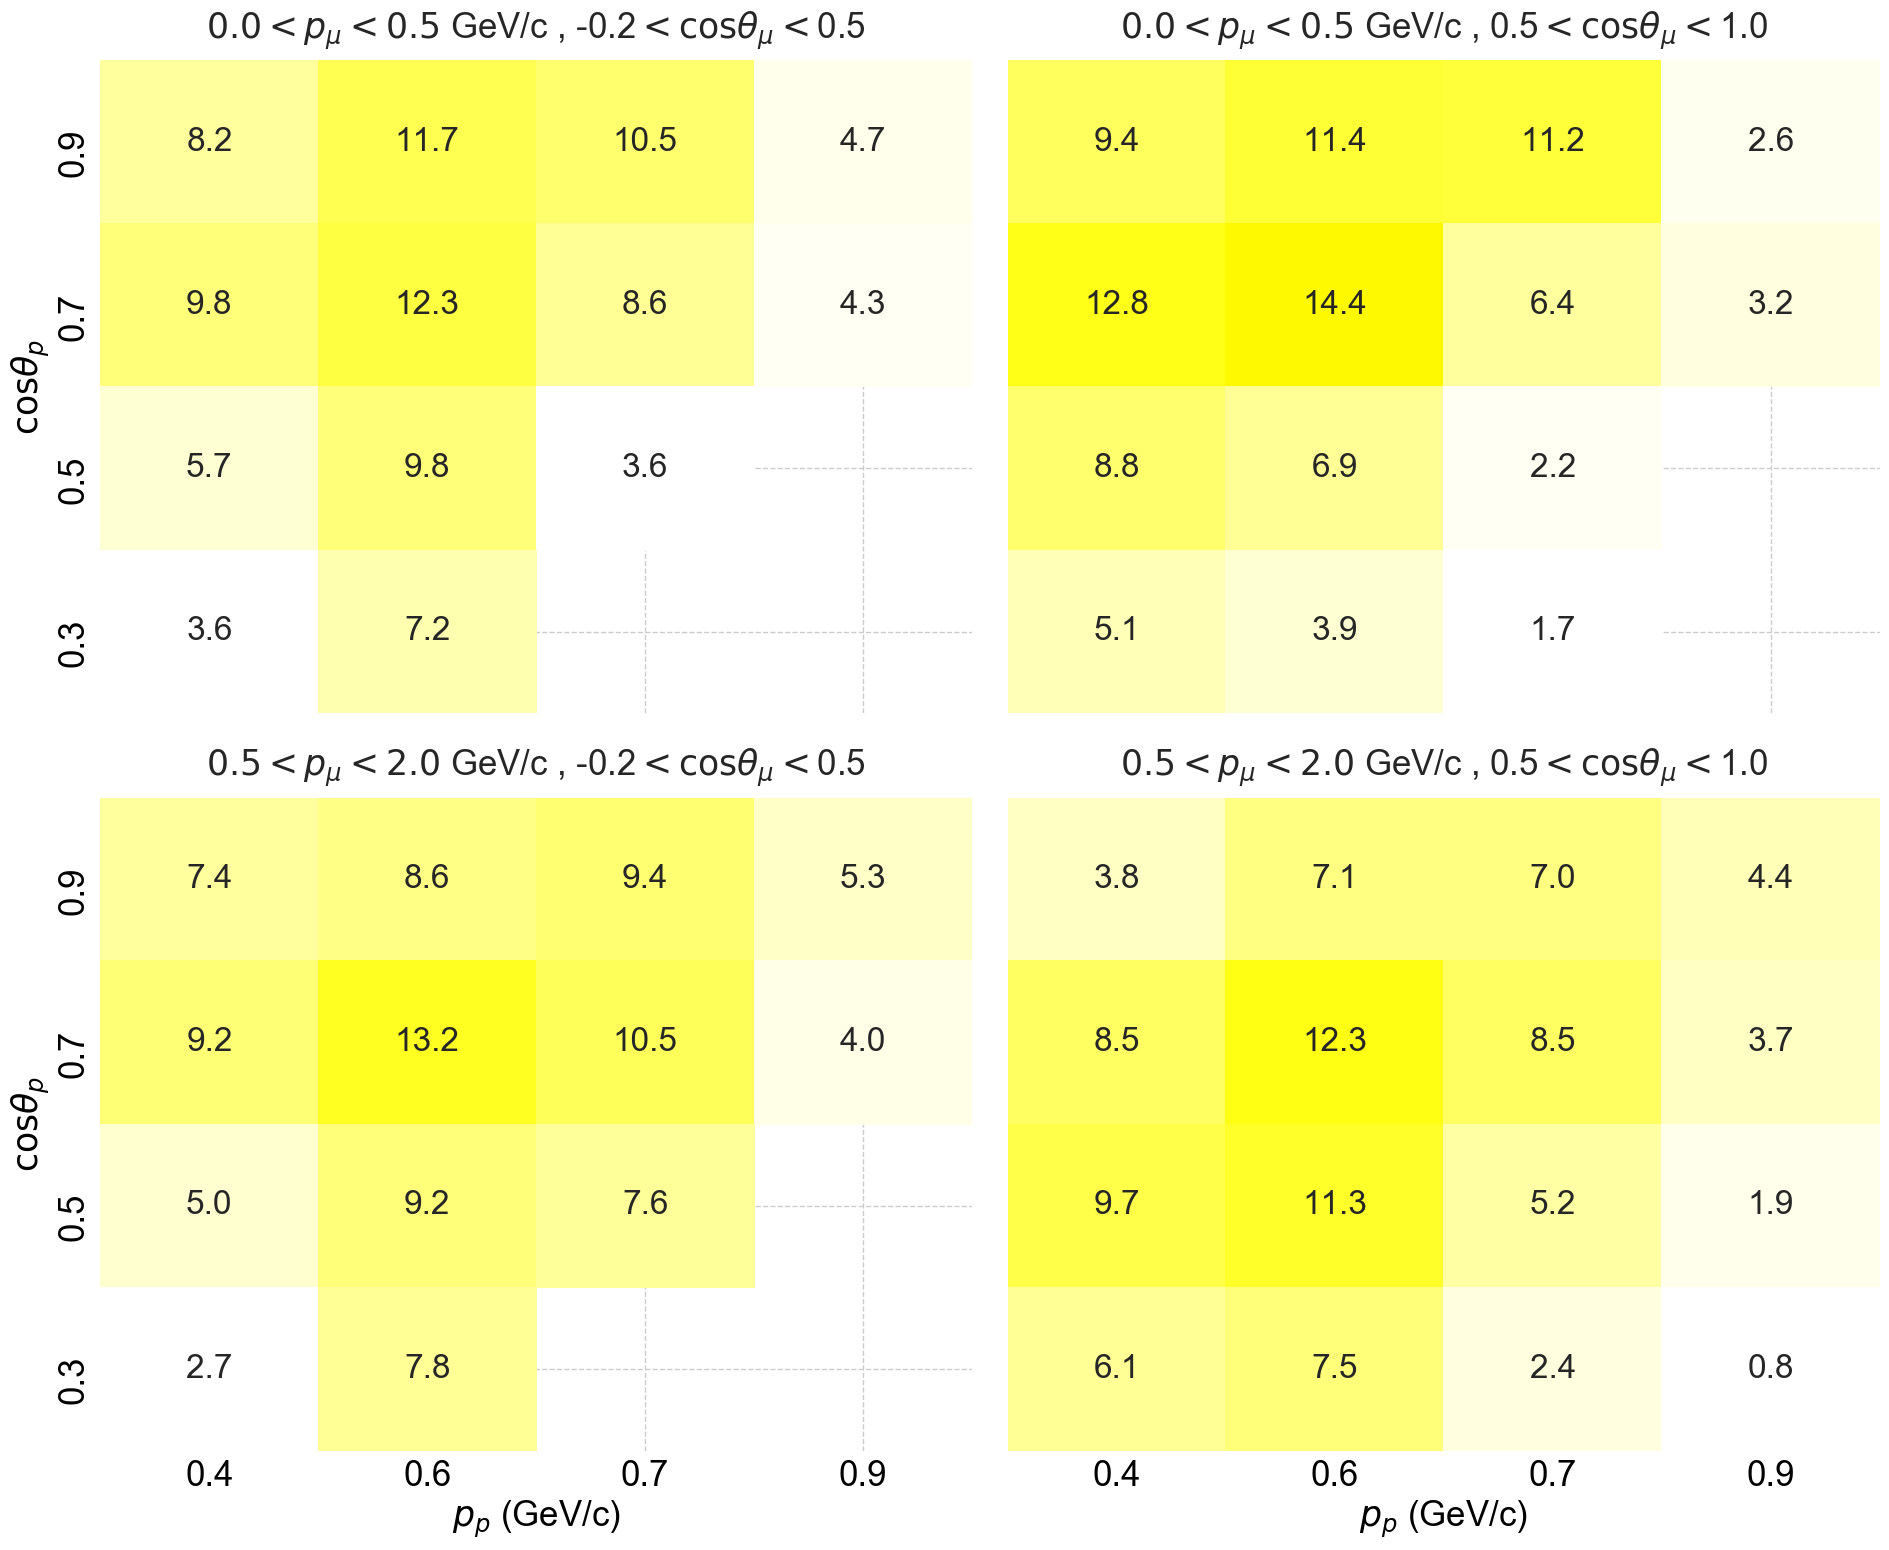

In [9]:
fig = plt.figure(figsize=(19.416,16))
sns.set_style('white')
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        ax = fig.add_subplot(2,2,2*iPmu+iPmu_cos_theta+1)
        histo = h_p_eff['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)]
        Integral = np.sum(h_p_eff['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)])
        print 'Integral:',Integral
        histo = histo/Integral
        histo[histo <= 0] = None
        sns.heatmap(100*histo,annot=True,cmap='hot_r',fmt=".1f",vmin=None,vmax=50
            ,xticklabels=["%.1f"%tick for tick in Pp_xcenters]
            ,yticklabels=["%.1f"%tick for tick in Pp_cos_theta_ycenters]
            ,cbar=False)
        set_axes(ax,do_add_grid=True,alpha_grid=1
                 ,x_label='' if iPmu==0 else  r'$p_p$ (GeV/c)'
                 ,remove_ticks_x=True if iPmu==0 else False
                 ,y_label=''  if iPmu_cos_theta==1 or iPmu_cos_theta==3 else  r'$\cos\theta_p$'
                 ,remove_ticks_y=True if iPmu_cos_theta==1 or iPmu_cos_theta==3 else False
                 ,title=r'$%.1f<p_\mu<%.1f$ GeV/c , %s$<\cos\theta_\mu<$%s'%(Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
                 )
        ax.invert_yaxis()
plt.tight_layout()

## generated and accepted

Integral: 13863.0
Integral: 8007.0
Integral: 6243.0
Integral: 47201.0


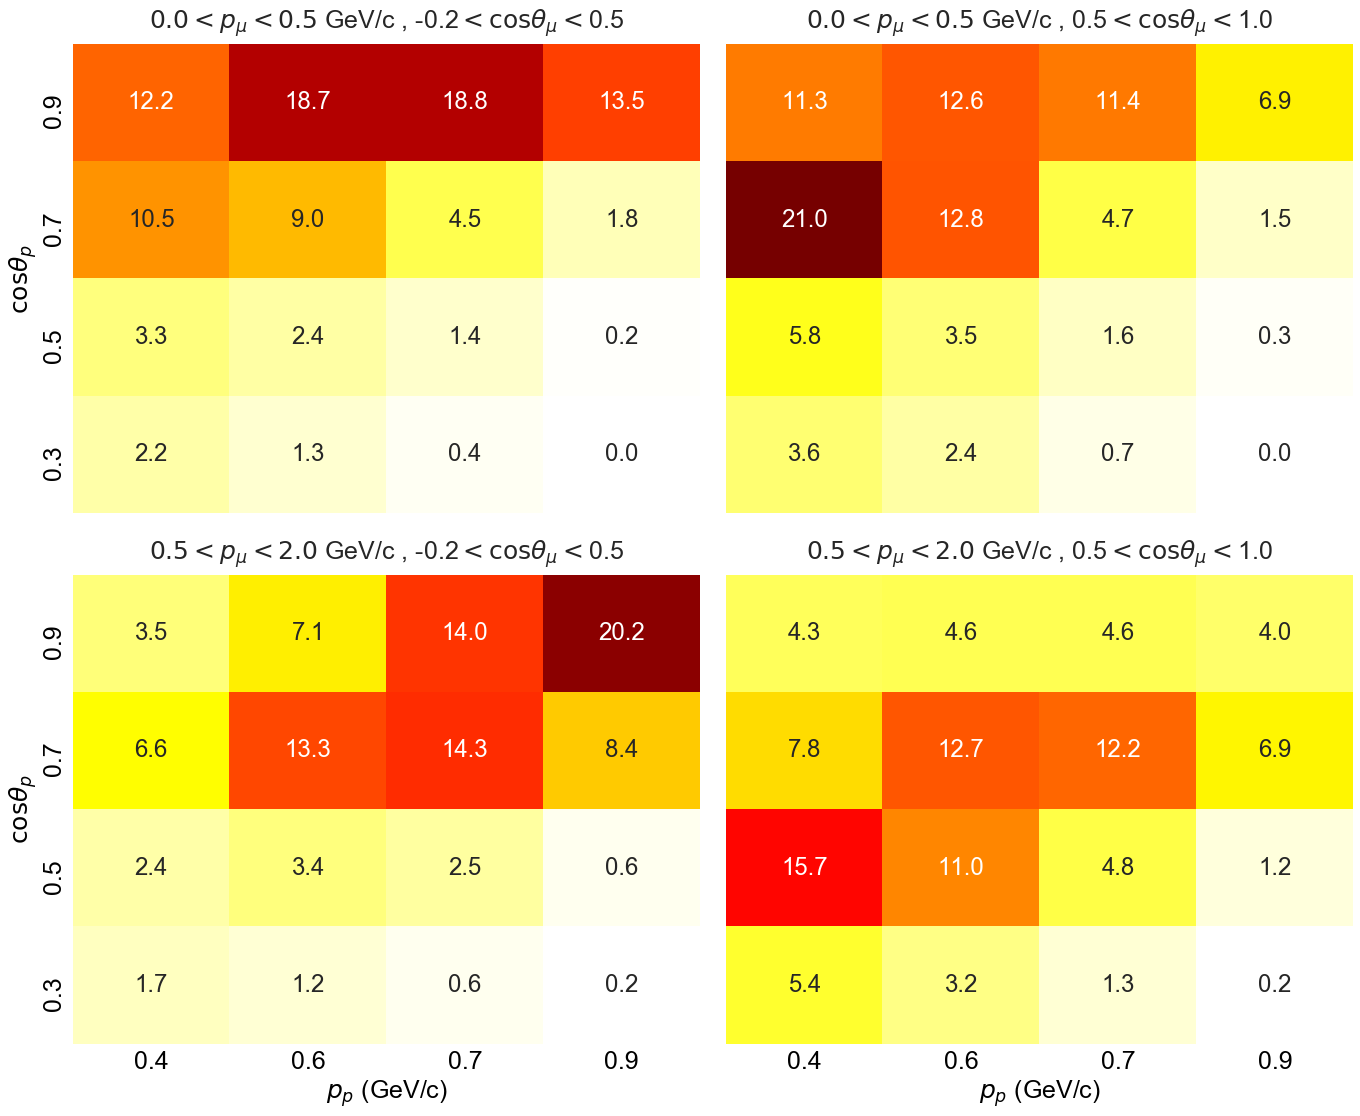

In [115]:
fig = plt.figure(figsize=(19.416,16))
sns.set_style('white')
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        ax = fig.add_subplot(2,2,2*iPmu+iPmu_cos_theta+1)
        histo = h_p_gen['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)]
        Integral = np.sum(h_p_gen['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)])
        print 'Integral:',Integral
        histo = histo/Integral
        histo[histo <= 0] = None
        sns.heatmap(100*histo,annot=True,cmap='hot_r',fmt=".1f",vmin=None,vmax=25
            ,xticklabels=["%.1f"%tick for tick in Pp_xcenters]
            ,yticklabels=["%.1f"%tick for tick in Pp_cos_theta_ycenters]
            ,cbar=False)
        set_axes(ax,do_add_grid=True,alpha_grid=1
                 ,x_label='' if iPmu==0 else  r'$p_p$ (GeV/c)'
                 ,remove_ticks_x=True if iPmu==0 else False
                 ,y_label=''  if iPmu_cos_theta==1 or iPmu_cos_theta==3 else  r'$\cos\theta_p$'
                 ,remove_ticks_y=True if iPmu_cos_theta==1 or iPmu_cos_theta==3 else False
                 ,title=r'$%.1f<p_\mu<%.1f$ GeV/c , %s$<\cos\theta_\mu<$%s'%(Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
                 )
        ax.invert_yaxis()
plt.tight_layout()

fig = plt.figure(figsize=(19.416,16))
sns.set_style('white')
for iPmu,(Pmu_min,Pmu_max) in enumerate(zip(large_bins_Pmu_min,large_bins_Pmu_max)):
    for iPmu_cos_theta,(Pmu_cos_theta_min,Pmu_cos_theta_max) in enumerate(zip(large_bins_Pmu_cos_theta_min,large_bins_Pmu_cos_theta_max)):
        ax = fig.add_subplot(2,2,2*iPmu+iPmu_cos_theta+1)
        histo = h_p_acc['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)]
        Integral = np.sum(h_p_acc['iPmu %d iPmu_cos_theta %d'%(iPmu,iPmu_cos_theta)])
        histo = histo/Integral
        histo[histo <= 0] = None
        sns.heatmap(100*histo,annot=True,cmap='hot_r',fmt=".1f",vmin=None,vmax=25
            ,xticklabels=["%.1f"%tick for tick in Pp_xcenters]
            ,yticklabels=["%.1f"%tick for tick in Pp_cos_theta_ycenters]
            ,cbar=False)
        set_axes(ax,do_add_grid=True,alpha_grid=1
                 ,x_label='' if iPmu==0 else  r'$p_p$ (GeV/c)'
                 ,remove_ticks_x=True if iPmu==0 else False
                 ,y_label=''  if iPmu_cos_theta==1 or iPmu_cos_theta==3 else  r'$\cos\theta_p$'
                 ,remove_ticks_y=True if iPmu_cos_theta==1 or iPmu_cos_theta==3 else False
                 ,title=r'$%.1f<p_\mu<%.1f$ GeV/c , %s$<\cos\theta_\mu<$%s'%(Pmu_min,Pmu_max,Pmu_cos_theta_min,Pmu_cos_theta_max)
                 )
        ax.invert_yaxis()
plt.tight_layout()